In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset : Salud del sueño y estilo de vida** 🥱
### Primera parte

1. **Ejercicio 1:**
Realizar un análisis exploratorio del dataset proporcionado a su grupo.
* Identificar la cantidad de variables y observaciones presentes.
* Realizar un resumen estadístico univariado.
* Describir brevemente la naturaleza de los datos.
* Determinar las columnas con valores faltantes.
2. **Ejercicio 2:**
* Seleccionar variables de interés y realizar gráficas que representen conjuntamente varias
columnas en función de algún criterio seleccionado. Justificar la selección de las mismas y
explicar brevemente el resultado obtenido.
3. **Ejercicio 3:**
Realizar un preprocesamiento del conjunto de datos:
* Proponer una estrategia y llevarla adelante para el manejo de valores faltantes y
eliminación de duplicados.
* Considerar la normalización o estandarización de las variables numéricas y la
codificación de las variables categóricas para su posterior análisis.
* Realiza la “dummificación” de al menos una variable categórica y una variable
numérica
Documentar los pasos realizados y justificar las decisiones tomadas.


## **Características de las variables** 📑 
Person ID: An identifier for each individual.<br>
Gender: The gender of the person (Male/Female).<br>
Age: The age of the person in years.<br>
Occupation: The occupation or profession of the person.<br>
Sleep Duration (hours): The number of hours the person sleeps per day.<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute.<br>
Daily Steps: The number of steps the person takes per day.<br>
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).<br>

In [98]:
# Carga del dataset
df = pd.read_csv("health_mod.csv")
df.head()

,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,1,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
1,1,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
2,2,3,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
3,3,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
4,4,5,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [99]:
columnas = ["Unnamed: 0", "ID de persona", "Género", "Edad", "Ocupación", "Duración del sueño", "Calidad del sueño", "Nivel de actividad física", "Nivel de estrés", "Categoría de IMC", "Presión arterial", "Frecuencia cardíaca", "Pasos diarios", "Trastorno del sueño"]
df.columns = columnas
df.head(5)

,Unnamed: 0,ID de persona,Género,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Categoría de IMC,Presión arterial,Frecuencia cardíaca,Pasos diarios,Trastorno del sueño
0,0,1,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
1,1,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
2,2,3,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
3,3,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
4,4,5,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [100]:
df.drop(["Unnamed: 0","ID de persona"], axis=1, inplace=True)
df.shape

(374, 12)

In [101]:
# Determinar columnas con valores nulos     
df.isnull().sum()

Género                       37
Edad                          7
Ocupación                     0
Duración del sueño           16
Calidad del sueño             0
Nivel de actividad física     0
Nivel de estrés              11
Categoría de IMC              0
Presión arterial              0
Frecuencia cardíaca           0
Pasos diarios                 0
Trastorno del sueño           0
dtype: int64

In [102]:
df.describe()

,Edad,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Frecuencia cardíaca,Pasos diarios
count,367.000000,358.000000,374.000000,374.000000,363.000000,374.000000,374.000000
mean,42.250681,7.134916,7.312834,59.171123,5.377410,70.165775,6816.844920
std,8.679940,0.800129,1.196956,20.830804,1.772484,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,36.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [103]:
print("Las columnas con valores nulos son: ", df.columns[df.isnull().any()])

Las columnas con valores nulos son:  Index(['Género', 'Edad', 'Duración del sueño', 'Nivel de estrés'], dtype='object')


In [104]:
df.dtypes

Género                        object
Edad                         float64
Ocupación                     object
Duración del sueño           float64
Calidad del sueño              int64
Nivel de actividad física      int64
Nivel de estrés              float64
Categoría de IMC              object
Presión arterial              object
Frecuencia cardíaca            int64
Pasos diarios                  int64
Trastorno del sueño           object
dtype: object

In [105]:
# Tipos de datos 
df.dtypes
df_cuantitativo = df.select_dtypes(include=['int', 'float'])
df_categorico = df.select_dtypes(include=['object'])
df_cuantitativo

,Edad,Duración del sueño,Calidad del sueño,Nivel de actividad física,Nivel de estrés,Frecuencia cardíaca,Pasos diarios
0,27.0,6.1,6,42,6.0,77,4200
1,28.0,6.2,6,60,8.0,75,10000
2,28.0,6.2,6,60,8.0,75,10000
3,28.0,5.9,4,30,8.0,85,3000
4,28.0,5.9,4,30,8.0,85,3000
...,...,...,...,...,...,...,...
369,59.0,8.1,9,75,3.0,68,7000
370,59.0,8.0,9,75,3.0,68,7000
371,59.0,8.1,9,75,3.0,68,7000
372,59.0,8.1,9,75,3.0,68,7000


## Correlacion de variables

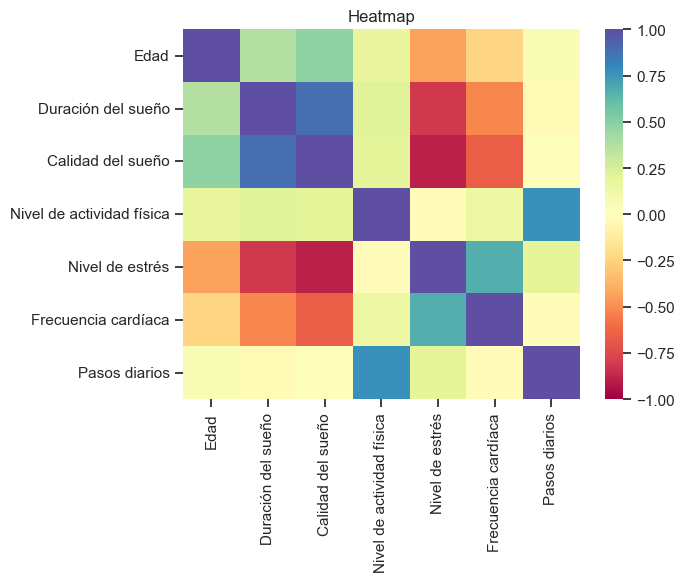

In [106]:
sns.heatmap(df_cuantitativo.corr(numeric_only=True), cmap='Spectral', vmin= -1)
plt.title('Heatmap')
plt.show()

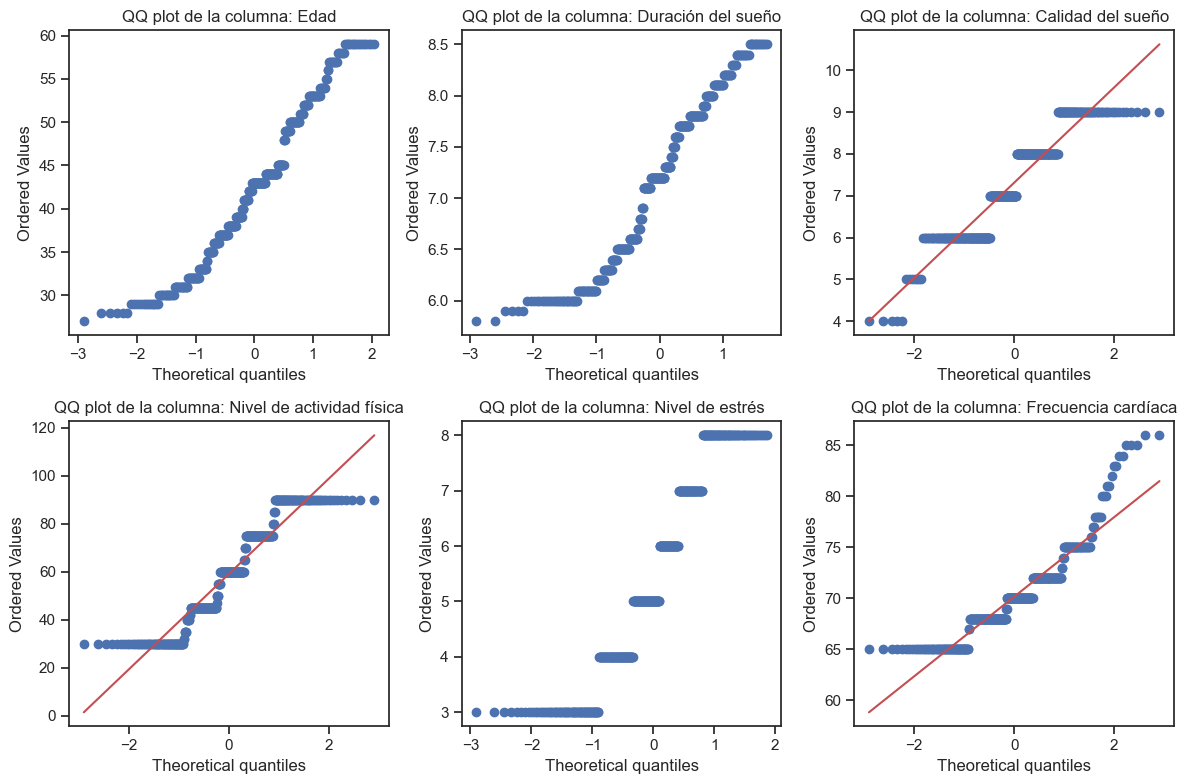

In [108]:
import scipy.stats as stats

columnas_de_interes = ["Edad", "Duración del sueño",	"Calidad del sueño",	"Nivel de actividad física", "Nivel de estrés",	"Frecuencia cardíaca"]

# Calcular el número de filas y columnas necesarias
num_filas = 2
num_columnas = 3

# Crear la figura y los subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 8))

# Generar el gráfico QQ plot para cada columna
for i, columna in enumerate(columnas_de_interes):
    # Calcular las coordenadas del subplot actual
    fila = i // num_columnas
    col = i % num_columnas
    
    # Seleccionar el subplot actual
    ax = axes[fila, col]
    
    # Generar el gráfico QQ plot para la columna actual
    stats.probplot(df_cuantitativo.iloc[:, i], dist="norm", plot=ax)
    
    # Establecer el título del subplot actual
    ax.set_title(f"QQ plot de la columna: {columna}")
    
# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

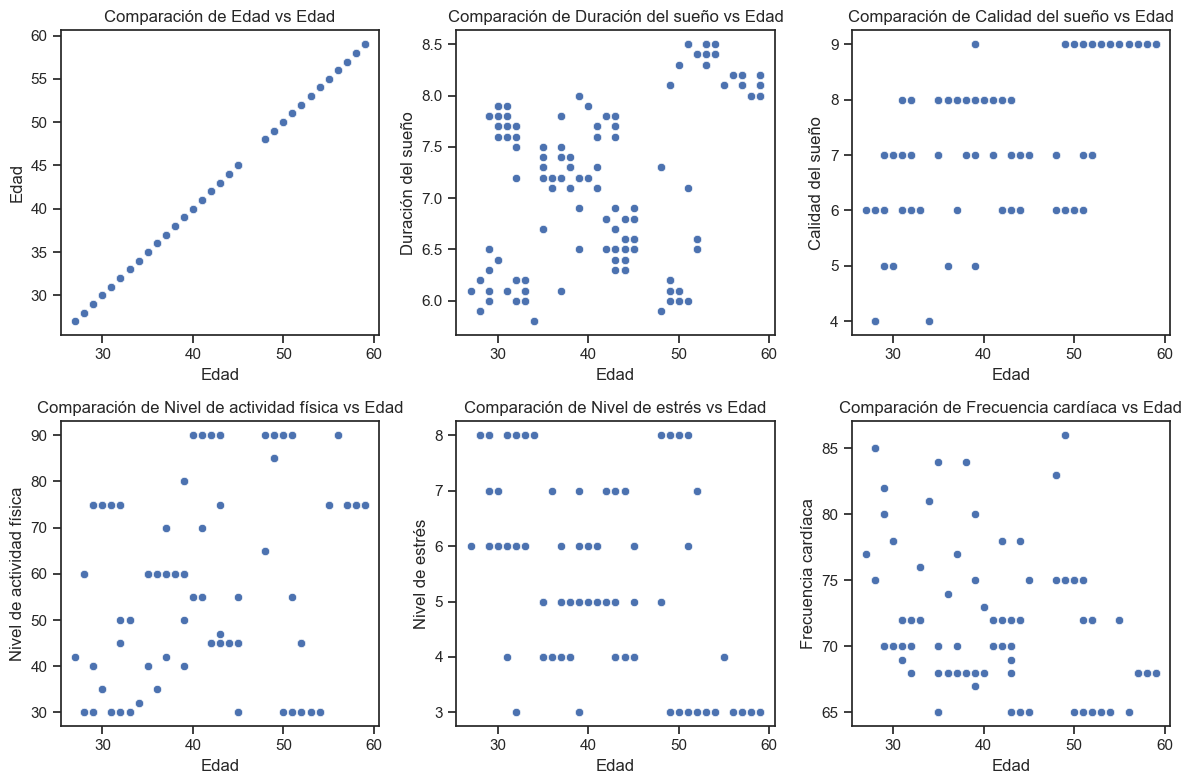

In [118]:
columnas_comparacion = ["Edad", "Duración del sueño",	"Calidad del sueño",	"Nivel de actividad física","Nivel de estrés", "Frecuencia cardíaca"]

# Configurar el estilo de los gráficos
sns.set(style="ticks")

# Crear la figura y los subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Generar los gráficos de dispersión en los subplots correspondientes
for i, columna in enumerate(columnas_comparacion):
    # Calcular las coordenadas del subplot actual
    fila = i // 3
    col = i % 3
    
    # Seleccionar el subplot actual
    ax = axes[fila, col]
    
    # Generar el gráfico de dispersión en el subplot actual
    sns.scatterplot(x="Edad", y=columna, data=df, ax=ax)
    
    # Establecer el título del subplot actual
    ax.set_title(f"Comparación de {columna} vs Edad")
    ax.set_xlabel("Edad")
    ax.set_ylabel(columna)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()